In [14]:
from scipy.interpolate import lagrange  # Possível forma de fazer o lagrange
import warnings
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial as poly
import sympy
from sympy.plotting import plot
sympy.init_printing()
sympy.var('x')
plt.style.use('seaborn-poster')
warnings.filterwarnings("ignore", category=UserWarning)


É possivel desenvolver uma função que possibilite inferir um valor para um ponto desconhecido.

Interpolar uma função 𝑓 (nem sempre conhecida) consiste em aproximar essa função
por uma função 𝑔. Assim, os valores de 𝑓 𝑥 podem ser estimados (com erro
controlado) por 𝑔 𝑥 , se 𝑥 está entre os valores observados fornecidos

# Interpolação Polinomial

    Temos uma função polinomial que intercepta a função f original nos pontos x0,x1,...xn. Sendo, portanto, p(xk) = f(xk). 
    Dessa forma obtemos um sistema de equações em que a0 + a1x0 + .... an*x0^n = f(x0)
    Essa matriz é denominada matriz de Vandermonde(suas linhas estão em PG) e se todos os x são distintos, a solução é única (det !=0)

In [15]:
# Exemplo
x = [-1, 0, 2]
fx = [4, 1, -1]


   p2(x) = ao + a1x + a2x**2
   p2(-1) = f(-1) = 4 -> ao -a1 + a2 = 4
   p2(0) = 1 -> a0 = 1
   p2(2) = f(2) = -1 -> a0 + a1*2 + a2*4 = -1
   
   a0 = 1; a1 = -7/3 ; a2 = 2/3
   
   p(x) = 1-7x/3+2(x**2)/3

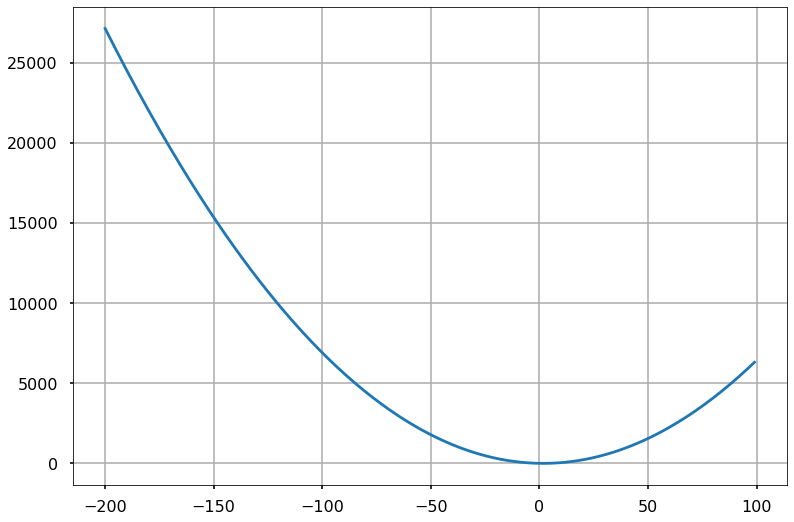

In [16]:
def interpolacao_sistema(x, fx):
    coef = np.array([[x[k]**n for n in range(len(fx))]for k in range(len(x))])
    return np.linalg.solve(coef, fx)


px = poly(interpolacao_sistema(x.copy(), fx.copy()))
plt.plot(r := np.arange(-200, 100, 1), px(r))
plt.grid()
plt.show()


# Polinômio de Lagrange

Para grau 1(linear), p1(x) = y0L0(x) + y1L1(x)

p1(x0) = y0 ; p1(x1) = y1 Seguindo a mesma condição de existência do polinômio anterior

O polinômio de Lagrange é tal que será 1 em seu ponto determinado e 0 nos pontos restantes.

L0(x0) = 1, L0(x1) = 0
L1(x0) = 0, L1(x1) = 1

L0(x) = (x-x1)/ (x0 - x1)
L1(x) = (x-x0)/(x1 - x0)

Caso Geral com n+1 pontos, de x0 até xn
pn(xk) = y0L0(xk) + ... + ynLn(xk) = yk

Os polinômios de Lagrange Lk(x); k = 0,1,...,n
Lk(xk) = 1, else = 0

Lk(x) = (x-x0)(x-x1)...(x-x(k-1))(x-x(k+1))...(x-xn) 
/
(xk-x0)(xk-x1)...(xk-x(k-1))(xk-x(k+1))...(xk-xn)

#Pulou(x-xk) e (xk-xk)

In [17]:
# Gabarito Lagrange
xff = np.array([-1, 0, 2])
y = np.array([4, 1, -1])
lag = lagrange(xff, y)
lag
# Começa pelo maior grau


poly1d([ 0.66666667, -2.33333333,  1.        ])

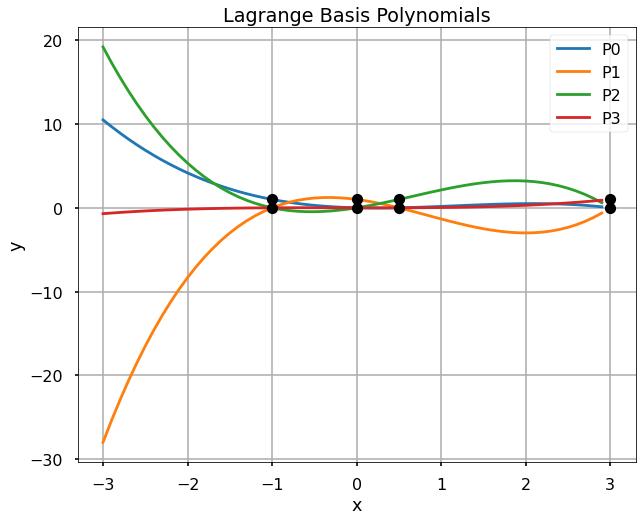

In [18]:
def Lagrange(xk, yk, show=False, a=-3, b=3, step=.1):
    """[summary]

    Args:
        Lx ([np.array]): [description]
        Ly ([np.array]): [description]

    Returns:
        Y=[Sympy.Poly]: The equation that describes the poly
        L=[List]: List of all parts of the Lagrange expression (L0,L1...Ln)
    """

    x = sympy.symbols('x')
    if len(xk) != len(yk):
        return -1  # Error
    Pk = 0
    L = []
    for k in range(len(xk)):
        Lk = 1
        for j in range(len(xk)):
            if j != k:
                Lk *= ((x-xk[j]) / (xk[k]-xk[j]))  # Cada fração
        Pk += Lk*yk[k]  # Total
        L.append(Lk)
    L = [sympy.Poly(z) for z in L]
    Pk = sympy.Poly(sympy.simplify(Pk))

    if show:
        Lcoeffs = [z.all_coeffs() for z in L]
        # get the polynomial function
        P = [poly(z[::-1]) for z in Lcoeffs]

        margin = np.arange(a, b, step)

        fig = plt.figure(figsize=(10, 8))

        for z in P:
            plt.plot(margin, z(margin))

        plt.plot(xk, np.ones(len(xk)), 'ko', xk, np.zeros(len(xk)), 'ko')
        # plt.plot(margin,p(margin))
        plt.title('Lagrange Basis Polynomials')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid()
        plt.legend([f'P{n}' for n in range(len(xk))])
        plt.show()

    return Pk, L


exemple = np.array([-1, 0, .5, 3])
yexemple = np.array([4, 1, -3, -1])
pk, L = Lagrange(exemple, yexemple, show=True)
(pk)  # .all_coeffs()
# L


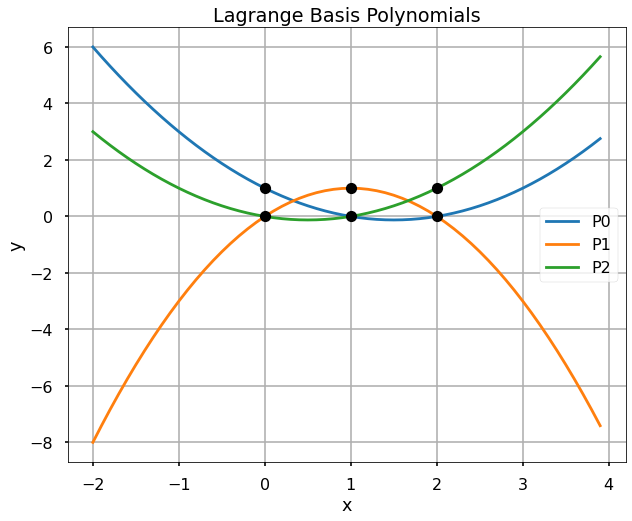

In [19]:
def show_lagrange(xk, yk, a=-3, b=3, step=.1):
    p, L = Lagrange(xk, yk)
    L = [z.all_coeffs() for z in L]
    # get the polynomial function
    P = [poly(z[::-1]) for z in L]

    margin = np.arange(a, b, step)

    fig = plt.figure(figsize=(10, 8))

    for z in P:
        plt.plot(margin, z(margin))

    plt.plot(xk, np.ones(len(xk)), 'ko', xk, np.zeros(len(xk)), 'ko')
    # plt.plot(margin,p(margin))
    plt.title('Lagrange Basis Polynomials')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend([f'P{n}' for n in range(len(xk))])
    plt.show()


xs = np.array([0, 1, 2])
ys = np.array([1, 3, 2])

show_lagrange(xs, ys, -2, 4, .1)


# Polinômios de Newton

Pn(x) interpola n+1 pontos distintos. N representa o grau do polinômio gerado

    𝑑0 =? 𝑝𝑛(𝑥0)=𝑑0 =𝑦0
    𝑑1 =? 𝑝𝑛 𝑥1 =𝑑0 +𝑑1( 𝑥1 −𝑥0) =𝑦1
    𝑑2 =? 𝑝𝑛 𝑥2 =𝑑0 +𝑑1( 𝑥2 −𝑥0) + 𝑑2 (𝑥2 -x0)(x2-𝑥1) =𝑦2

In [20]:
def newton_linear(ponto, xk, y):  # grau 1: dois pontos conhecidos
    # p1(x0) = y0, p1(x1) = y1
    # d0,d1 = ?
    assert y[0] <= ponto <= y[-1]
    p1_x0 = y[0]  # = d0
    def p1(x): return p1_x0 + (y[1]-y[0])/(xk[1]-xk[0])*(x-xk[0])
    return p1(ponto)


In [21]:
def newton_npontos(xk, yk):
    x = sympy.symbols('x')

    def get_dlist(xk, yk):
        dlist = [y[0]]


newton_npontos(xs, ys)


In [22]:
for c in enumerate(ys):
    print(c)


(0, 1)
(1, 3)
(2, 2)


# Mínimos Quadrados

In [23]:
def desvio_total():
    """Soma os quadrados dos desvios obtidos entre a curva final e a 
    interpolação através da diferença da 
    f(x) original e da f(x) obtida
    """
    ...


[[69.   ]
 [ 1.648]]
69.0 1.648


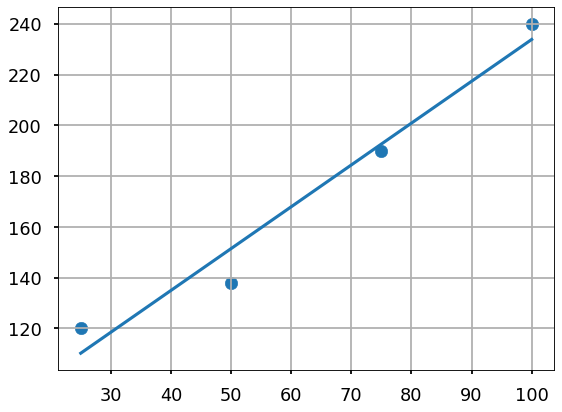

In [24]:
def ajuste_linear(xk, yk):
    # Algumas equações https://prnt.sc/7Es7_BFieNdb
    # Precisa determinar a1 e a2 do polinomio a1 + a2*x
    # Minimo ocorre quando dR/da1 = dR/da2 = 0
    # residuo
    xk = np.array(xk)
    yk = np.array(yk)
    def R(a1, a2): return sum([(a1+a2*_x - _y)**2 for _x, _y in zip(xk, yk)])
    M = np.array([[len(xk), sum(xk)], [sum(xk), sum(xk**2)]])
    w = np.array([[sum(yk)], [sum(xk*yk)]])
    print(np.linalg.solve(M, w))
    a1 = (sum(xk**2)*sum(yk)-sum(xk)*sum(xk*yk)) / \
        (len(xk)*sum(xk**2)-sum(xk)**2)
    a2 = (len(xk)*sum(xk*yk) - sum(xk)*sum(yk))/(len(xk)*sum(xk**2)-sum(xk)**2)
    print(a1, a2)
    return a1, a2


perlita = np.array([25, 50, 75, 100])
dureza = np.array([120, 138, 190, 240])
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(perlita, dureza), plt.grid()
a1, a2 = ajuste_linear(perlita, dureza)
def y_(x): return a1+a2*x


plt.plot(perlita, y_(perlita))
plt.show()


    Interpolação polinomial é o caso particular do ajuste linear para
    funções polinomiais 𝑓1 𝑥 ,𝑓2 𝑥 ,𝑓3 𝑥 ,... = {1,𝑥,𝑥**2,...}


[[2.00000000e+00 4.26642159e-17]
 [4.26642159e-17 3.00000000e+00]]
<function _lambdifygenerated at 0x00000166715D3400>


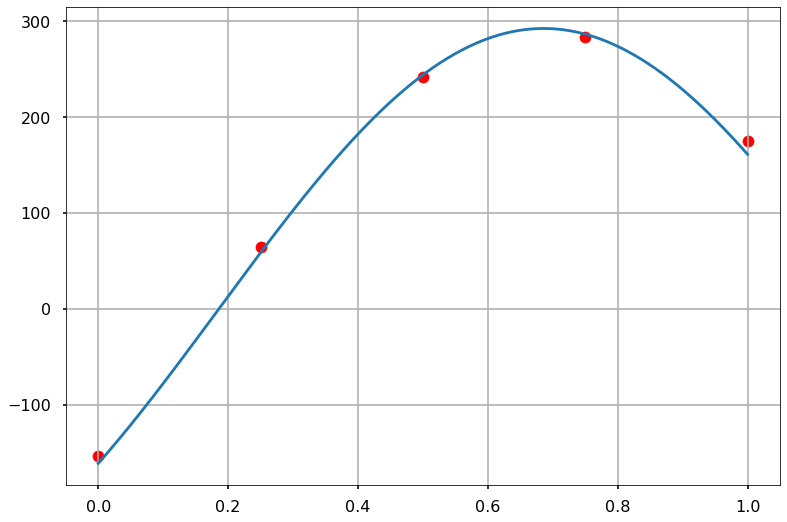

In [92]:
def ajuste_linear_geral(xk, yk, funcs):
    # Função f(x) = a1f1(x) + ... + amfm(x)
    # V = f1(x1) ... fm(x1)
    #    f1(xn) ... fm(xn)
    # a = (Vt*V)^-1 * Vt*y
    xk = np.array(xk)
    yk = np.array(yk)
    V = np.array([[funcs[n].subs(x,xn) for n in range(len(funcs))] for xn in xk],dtype=np.float64)
    Vmult = V.T@V

    print(Vmult)

    Vinv = np.linalg.inv(Vmult)
    a = Vinv@V.T@yk
    a = a.T
    #sympy.core.mul.Mul
    func = 0
    
    for n in range(len(a)):
        func+= a[n]*funcs[n]
    func = sympy.lambdify(x, func, modules=['numpy'])
    
    return func
    


x = sympy.var("x")
funcs = [sympy.sin(sympy.pi*x), sympy.cos(sympy.pi*x)]

xi = np.arange(0, 1.1, .25)
yi = [-153, 64, 242, 284, 175]
func = ajuste_linear_geral(xi, yi, funcs)
print(func)

plt.plot(_x := np.linspace(xi[0], xi[-1], 360), func(_x))

plt.scatter(xi, yi, color='r')
plt.grid()
plt.show()
